In [128]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from epitools import between_p, within_p

In [2]:
df = pd.DataFrame([
    ("A", "I", 0.75, 75),
    ("A", "II", 0.25, 25),
    ("A", "III", 0, 0),
    ("A", "IV", 0, 0),
    ("B", "I", 0.25, 25),
    ("B", "II", 0.75, 75),
    ("B", "III", 1, 100),
    ("B", "IV", 1, 100),
], columns=["candidate", "polling_id", "rate", "value"])
df

,candidate,polling_id,rate,value
0,A,I,0.75,75
1,A,II,0.25,25
2,A,III,0.00,0
3,A,IV,0.00,0
4,B,I,0.25,25
5,B,II,0.75,75
6,B,III,1.00,100
7,B,IV,1.00,100


In [3]:
between_p(df), within_p(df)

(  candidate     value  weight     type
 0         A  0.250000    0.25  Between
 1         B  0.083333    0.75  Between,
   candidate     value  weight    type
 0         A  0.375000    0.25  Within
 1         B  0.208333    0.75  Within)

In [29]:
steps = 5

items = np.linspace(0, 1, steps)

a = []
for i in range(steps):
    a.append(items)

rates_a = list(itertools.product(*a))

In [30]:
rates_a[-5:]

[(1.0, 1.0, 1.0, 1.0, 0.0),
 (1.0, 1.0, 1.0, 1.0, 0.25),
 (1.0, 1.0, 1.0, 1.0, 0.5),
 (1.0, 1.0, 1.0, 1.0, 0.75),
 (1.0, 1.0, 1.0, 1.0, 1.0)]

### Election with 2 candidates, 3 districts

In [31]:
def generate_data(rates, candidate_label="A"):
    if candidate_label == "A":
        data = pd.DataFrame(np.array(rates))
    else:
        data = pd.DataFrame(1 - np.array(rates))

    data["election_id"] = range(1, data.shape[0] + 1)
    data = data.melt(id_vars=["election_id"], var_name="polling_id", value_name="rate")
    data["candidate"] = candidate_label
    
    return data

In [32]:
df_election_a = generate_data(rates_a, candidate_label="A")
df_election_b = generate_data(rates_a, candidate_label="B")
df_election_b

,election_id,polling_id,rate,candidate
0,1,0,1.00,B
1,2,0,1.00,B
2,3,0,1.00,B
3,4,0,1.00,B
4,5,0,1.00,B
...,...,...,...,...
15620,3121,4,1.00,B
15621,3122,4,0.75,B
15622,3123,4,0.50,B
15623,3124,4,0.25,B


In [33]:
size = 100

df_election = pd.concat([df_election_a, df_election_b], ignore_index=True)
df_election["value"] = size * df_election["rate"]
df_election["polling_id"] = df_election["polling_id"].astype(int)
df_election

,election_id,polling_id,rate,candidate,value
0,1,0,0.00,A,0.0
1,2,0,0.00,A,0.0
2,3,0,0.00,A,0.0
3,4,0,0.00,A,0.0
4,5,0,0.00,A,0.0
...,...,...,...,...,...
31245,3121,4,1.00,B,100.0
31246,3122,4,0.75,B,75.0
31247,3123,4,0.50,B,50.0
31248,3124,4,0.25,B,25.0


In [9]:
df_election[df_election["election_id"] == 4]

,election_id,polling_id,rate,candidate,value
3,4,0,0.00,A,0.0
3128,4,1,0.00,A,0.0
6253,4,2,0.00,A,0.0
9378,4,3,0.00,A,0.0
12503,4,4,0.75,A,75.0
15628,4,0,1.00,B,100.0
18753,4,1,1.00,B,100.0
21878,4,2,1.00,B,100.0
25003,4,3,1.00,B,100.0
28128,4,4,0.25,B,25.0


In [10]:
df_election.dtypes

election_id      int64
polling_id       int32
rate           float64
candidate       object
value          float64
dtype: object

In [105]:
def get_election_data(
    N_candidates = 2,
    N_elections = 5000,
    N_units = 3
):
    data = np.random.dirichlet(np.ones(N_candidates), size=(N_elections, N_units))

    df_election = []
    for idx, election in enumerate(data):
        # tmp = pd.DataFrame(-1*np.sort(-election))

        tmp = pd.DataFrame(election)
        tmp["election_id"] = f"{(idx + 1)}-{N_candidates}"
        tmp["polling_id"] = range(1, tmp.shape[0] + 1)
        tmp = tmp.melt(id_vars=["election_id", "polling_id"], value_name="rate", var_name="candidate")
        tmp["value"] = (100 * tmp["rate"]).astype(int)
        
        df_election.append(tmp)

    df_election = pd.concat(df_election, ignore_index=True)
    df_election["polling_id"] = df_election["polling_id"].astype(int)
    df_election["candidate"] = df_election["candidate"].astype(str)
    df_election["N_candidates"] = N_candidates
    
    return df_election

In [142]:
df_election = get_election_data(
    N_candidates = 2,
    N_elections = 20000,
    N_units = 3
)

for i in range(3, 6 + 1):
    tmp = get_election_data(
        N_candidates = i,
        N_elections = 20000,
        N_units = 3
    )
    df_election = pd.concat([df_election, tmp])

df_election.head()

,election_id,polling_id,candidate,rate,value,N_candidates
0,1-2,1,0,0.405758,40,2
1,1-2,2,0,0.366910,36,2
2,1-2,3,0,0.233275,23,2
3,1-2,1,1,0.594242,59,2
4,1-2,2,1,0.633090,63,2


In [143]:
output = []
for idx, tmp in df_election.groupby(["election_id", "N_candidates"]):
    election_id, N_candidates = idx
    value_a = between_p(tmp)
    value_b = within_p(tmp)
    df_dv = pd.concat([value_a, value_b])
    df_dv["election_id"] = election_id
    df_dv["N_candidates"] = N_candidates
    output.append(df_dv)

data = pd.concat(output, ignore_index=True)
data.head()

,candidate,value,weight,type,election_id,N_candidates
0,0,0.351560,0.333333,Between,1-2,2
1,1,0.327192,0.666667,Between,1-2,2
2,0,0.064718,0.333333,Within,1-2,2
3,1,0.070671,0.666667,Within,1-2,2
4,0,0.274186,0.301695,Between,1-3,3


In [144]:
data.to_csv("simulation_epi.csv", index=False)

In [110]:
# data_election = df_election.groupby(["election_id", "candidate"]).agg({"rate": "mean"}).reset_index().pivot(
#     index="election_id", columns="candidate", values="rate"
# ).reset_index()
# data_election

In [145]:
df_winner = df_election.groupby(["election_id", "candidate"]).agg({"rate": "mean"})\
    .sort_values(["election_id", "rate"], ascending=False).groupby("election_id").head(1).reset_index()\
    .rename(columns={"rate": "percent"})
df_winner.head()

,election_id,candidate,percent
0,9999-6,2,0.286913
1,9999-5,1,0.267318
2,9999-4,2,0.471478
3,9999-3,2,0.575550
4,9999-2,1,0.630387


In [146]:
df_dispersion = pd.merge(df_election, df_winner, on=["election_id", "candidate"]).groupby("election_id").agg({"rate": "std"}) ** 2
df_dispersion = df_dispersion.reset_index().rename(columns={"rate": "dispersion"})
df_dispersion.head()

,election_id,dispersion
0,1-2,0.008186
1,1-3,0.033904
2,1-4,0.056406
3,1-5,0.071266
4,1-6,0.064841


In [147]:
df_descriptive = pd.merge(df_winner, df_dispersion, on="election_id")
df_descriptive.head()

,election_id,candidate,percent,dispersion
0,9999-6,2,0.286913,0.004884
1,9999-5,1,0.267318,0.012001
2,9999-4,2,0.471478,0.001396
3,9999-3,2,0.575550,0.002660
4,9999-2,1,0.630387,0.062852


In [200]:
df_epi = data[data["N_candidates"] == 2].groupby(["election_id", "type"]).agg({"value": "sum"}).reset_index()\
    .pivot(index="election_id", columns="type", values="value").reset_index()

df_epi["epi"] = df_epi["Between"] + df_epi["Within"]
df_epi.head()

type,election_id,Between,Within,epi
0,1-2,0.678751,0.135389,0.814140
1,10-2,0.916865,0.068691,0.985556
2,100-2,0.368799,0.595532,0.964331
3,1000-2,0.553845,0.395289,0.949135
4,10000-2,0.600326,0.376816,0.977142


In [201]:
df_epi

type,election_id,Between,Within,epi
0,1-2,0.678751,0.135389,0.814140
1,10-2,0.916865,0.068691,0.985556
2,100-2,0.368799,0.595532,0.964331
3,1000-2,0.553845,0.395289,0.949135
4,10000-2,0.600326,0.376816,0.977142
...,...,...,...,...
19995,9995-2,0.450493,0.214956,0.665449
19996,9996-2,0.489234,0.472502,0.961736
19997,9997-2,0.573239,0.370956,0.944195
19998,9998-2,0.709249,0.403364,1.112613


In [202]:
dd = pd.merge(df_epi, df_descriptive, on="election_id")

def set_labels(x):
    lf = int(round(x.left * 100, 0))
    rg = int(round(x.right * 100, 0))

    return f"{lf}%-{rg}%"

N_buckets = 11
dd["percent_bin"] = pd.cut(dd["percent"], N_buckets).apply(set_labels)
dd["dispersion_bin"] = pd.cut(dd["dispersion"], N_buckets).apply(set_labels)


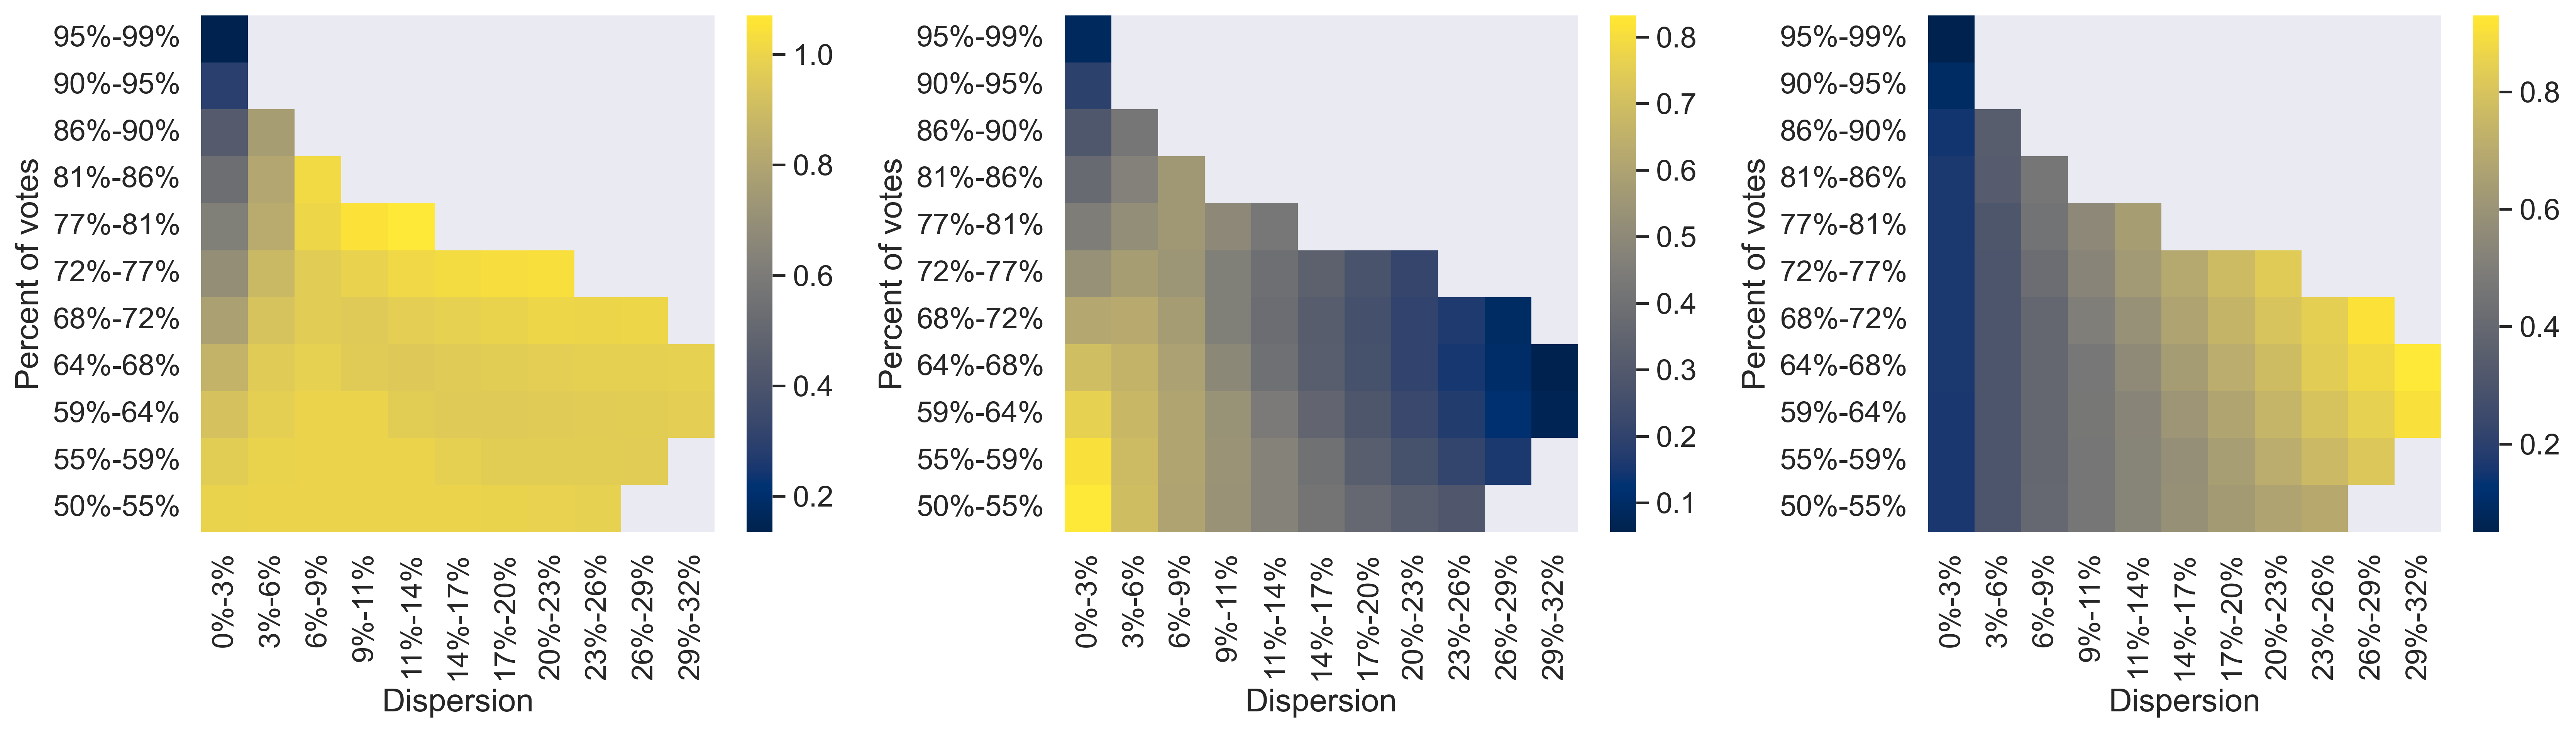

In [203]:
sns.set(font_scale=1.25)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(17, 5), dpi=400)
for idx, measure_name in enumerate(["epi", "Between", "Within"]):

    ax = axs[idx]
    
    data_hmap = dd.groupby(["percent_bin", "dispersion_bin"]).agg({measure_name: "mean"}).reset_index()
    data_hmap = data_hmap.pivot(index="percent_bin", columns="dispersion_bin", values=measure_name)

    g = sns.heatmap(data_hmap, cmap="cividis", ax=ax)
    # g.axhline(y=7.5, color="red", ls="--")
    g.invert_yaxis()
    g.set_xlabel("Dispersion")
    g.set_ylabel("Percent of votes")
    # g.set_xticks([])
    # g.set_yticks([])
fig.tight_layout()

In [23]:
# prev 0.22 1.52 10 candidates and 3 units
# prev 